<a href="https://colab.research.google.com/github/Marudhan/MiniProject/blob/main/MINI_PROJECT_6_AIRPORT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Questions (Part I)**

1.Top 20 highest altitude airports in the world. Choose only “type” with “airport”
Output:
airport_id, name, city, country, altitude, rank

2.Top 20 countries that have the highest total # of airports.
Output:
country, total_airports, rank

3.Top 20 cities that have the highest total # of airports. (Two cities from different countries can have the same name, and you have to make sure the numbers are not messed up due to that!)
Output:
city, total_airports, rank

4.Pair of cities that have the same name, but from two different countries.
(hint: Use self join with query in Python (slack example))
Output:
city_a, country_a, city_b, country_b


In [1]:
import pandas as pd
from tabulate import tabulate
import traceback
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as py
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
db1 = pd.read_csv('/content/airports.dat.txt', header=None, names=["Airport_ID","Name","City","Country","IATA","ICAO","Latitude","Longitude","Altitude","Timezone","DST","Tz database timezone","Type","Source"])
db1.head(5)

,Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [4]:
db1_airport = db1[db1['Type'] == 'airport']
db1_airport_sorted = db1_airport.sort_values('Altitude', ascending=False)
top20_airports = db1_airport_sorted.head(20)
top20_airports = top20_airports[['Airport_ID', 'Name', 'City', 'Country', 'Altitude']]
top20_airports['rank'] = range(1, len(top20_airports) + 1)
print(tabulate(top20_airports, headers='keys', tablefmt='psql'))

+------+--------------+----------------------------------------+-------------+-----------+------------+--------+
|      |   Airport_ID | Name                                   | City        | Country   |   Altitude |   rank |
|------+--------------+----------------------------------------+-------------+-----------+------------+--------|
| 6542 |         9310 | Daocheng Yading Airport                | Daocheng    | China     |      14472 |      1 |
| 5028 |         6396 | Qamdo Bangda Airport                   | Bangda      | China     |      14219 |      2 |
| 6393 |         8921 | Kangding Airport                       | Kangding    | China     |      14042 |      3 |
| 5872 |         7932 | Ngari Gunsa Airport                    | Shiquanhe   | China     |      14022 |      4 |
| 2625 |         2762 | El Alto International Airport          | La Paz      | Bolivia   |      13355 |      5 |
| 2627 |         2764 | Capitan Nicolas Rojas Airport          | Potosi      | Bolivia   |      

In [5]:
airport_counts = db1.groupby('Country')['Airport_ID'].count().sort_values(ascending=False).reset_index()
airport_counts = airport_counts.rename(columns={'Airport_ID': 'total_airports'})
airport_counts['rank'] = range(1, len(airport_counts) + 1)
top20_countries = airport_counts.head(20)
print(tabulate(top20_countries, headers='keys', tablefmt='psql'))

+----+----------------+------------------+--------+
|    | Country        |   total_airports |   rank |
|----+----------------+------------------+--------|
|  0 | United States  |             1512 |      1 |
|  1 | Canada         |              430 |      2 |
|  2 | Australia      |              334 |      3 |
|  3 | Russia         |              264 |      4 |
|  4 | Brazil         |              264 |      5 |
|  5 | Germany        |              249 |      6 |
|  6 | China          |              241 |      7 |
|  7 | France         |              217 |      8 |
|  8 | United Kingdom |              167 |      9 |
|  9 | India          |              148 |     10 |
| 10 | Indonesia      |              145 |     11 |
| 11 | Japan          |              123 |     12 |
| 12 | South Africa   |               99 |     13 |
| 13 | Argentina      |               96 |     14 |
| 14 | Mexico         |               84 |     15 |
| 15 | Italy          |               83 |     16 |
| 16 | Iran 

In [6]:
city_counts = db1.groupby(['City','Country'])['Airport_ID'].count().sort_values(ascending=False).reset_index()
city_counts = city_counts.rename(columns={'Airport_ID': 'total_airports'})
city_counts['rank'] = range(1, len(city_counts) + 1)
top20_cities = city_counts.head(20)
print(tabulate(top20_cities, headers='keys', tablefmt='psql'))

+----+--------------+----------------+------------------+--------+
|    | City         | Country        |   total_airports |   rank |
|----+--------------+----------------+------------------+--------|
|  0 | Columbus     | United States  |                8 |      1 |
|  1 | Houston      | United States  |                6 |      2 |
|  2 | London       | United Kingdom |                6 |      3 |
|  3 | New York     | United States  |                6 |      4 |
|  4 | Moscow       | Russia         |                6 |      5 |
|  5 | Jacksonville | United States  |                6 |      6 |
|  6 | Izmir        | Turkey         |                5 |      7 |
|  7 | Vancouver    | Canada         |                5 |      8 |
|  8 | Greenville   | United States  |                5 |      9 |
|  9 | Atlanta      | United States  |                5 |     10 |
| 10 | Burlington   | United States  |                4 |     11 |
| 11 | Johannesburg | South Africa   |                4 |     

In [7]:
city_pairs = db1.merge(db1, on='City', suffixes=('_a', '_b'))
city_pairs = city_pairs[city_pairs['Country_a'] != city_pairs['Country_b']]
city_pairs = city_pairs[['City', 'Country_a', 'Country_b']].drop_duplicates()
city_pairs = city_pairs.dropna()
print(tabulate(city_pairs, headers='keys', tablefmt='psql'))


+-------+----------------+---------------------------+---------------------------+
|       | City           | Country_a                 | Country_b                 |
|-------+----------------+---------------------------+---------------------------|
|    47 | Princeton      | Canada                    | United States             |
|    59 | Eureka         | Canada                    | United States             |
|    68 | Kingston       | Canada                    | Jamaica                   |
|    73 | Geraldton      | Canada                    | Australia                 |
|    80 | Hamilton       | Canada                    | New Zealand               |
|    81 | Hamilton       | Canada                    | Australia                 |
|    82 | Hamilton       | Canada                    | United States             |
|    94 | Stephenville   | Canada                    | United States             |
|    98 | Waterloo       | Canada                    | United States             |
|   

**PARTII**

1.In the year 2009, print Top 10 cities in the USA that received maximum # inbound flights.
Output:
city,total_inbound_flights,rank

2.In the year 2009, print Top 10 cities in the USA that received maximum # outbound flights.
Output:
city,total_outbound_flights,rank

3.In between 1999-2009, print Top 10 cities in the USA that received maximum # outbound flights.
Output:
city,total_outbound_flights, rank

4.In between 1999-2009, the Top 10 cities in the USA carry the maximum total # of passengers on outbound flights. The city column in the output will also have its state (For example San Francisco, CA).
Output:
city,total_num_passengers,rank

5.In the years 2007 and 2009 together, the Top 10 states in the USA carry the maximum total # of passengers on the outbound flights. [Expected output]
Output:
state,total_num_passengers,rank

6.Merge the columns outputs in questions 1 and 2 from Part II
Output:
city,total_inbound_flights,inbound_rank,total_outbound_flights,outbound_rank

7.Plot group bar chart (see below image) with seaborn/matplotlib for the output in question 6 above, specifically city,total_inbound_flights,total_outbound_flights. One bar for total_inbound_flights and another for total_outbound_flights. Plot for only top 10 cities by total_inbound_flights.

In [9]:
df1 = pd.read_csv('/content/drive/MyDrive/DATA ANALYTICS/Airports2.csv')
df1.head(5)

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002


In [10]:
df1['year'] = pd.to_datetime(df1['Fly_date']).dt.year
df1.head(5)

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,year
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN,2008
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002,1990
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002,1990
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002,1990
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002,1990


In [12]:
import numpy as np
df_2009 = df1[df1['year'] == 2009]
inbound_flights = df_2009.groupby('Destination_city')['Flights'].sum().sort_values(ascending=False)
top_10_inbound = inbound_flights.head(10)
rank = np.arange(1, len(top_10_inbound) + 1)
top_10_inbound_df = pd.DataFrame({'total_inbound_flights': top_10_inbound.values, 'rank': rank}, index=top_10_inbound.index)
print(tabulate(top_10_inbound_df, headers='keys', tablefmt='psql'))

+--------------------+-------------------------+--------+
| Destination_city   |   total_inbound_flights |   rank |
|--------------------+-------------------------+--------|
| Chicago, IL        |                  417297 |      1 |
| Atlanta, GA        |                  396603 |      2 |
| Dallas, TX         |                  316265 |      3 |
| New York, NY       |                  278206 |      4 |
| Houston, TX        |                  250030 |      5 |
| Washington, DC     |                  238744 |      6 |
| Charlotte, NC      |                  199700 |      7 |
| Los Angeles, CA    |                  192676 |      8 |
| Detroit, MI        |                  183655 |      9 |
| Philadelphia, PA   |                  181645 |     10 |
+--------------------+-------------------------+--------+


In [13]:
outbound_flights = df_2009.groupby('Origin_city')['Flights'].sum().sort_values(ascending=False)
top_10_outbound = outbound_flights.head(10)
rank = np.arange(1, len(top_10_outbound) + 1)
top_10_outbound_df = pd.DataFrame({'total_outbound_flights': top_10_outbound.values, 'rank': rank}, index=top_10_outbound.index)
print(tabulate(top_10_outbound_df, headers='keys', tablefmt='psql'))

+------------------+--------------------------+--------+
| Origin_city      |   total_outbound_flights |   rank |
|------------------+--------------------------+--------|
| Chicago, IL      |                   416742 |      1 |
| Atlanta, GA      |                   397112 |      2 |
| Dallas, TX       |                   316739 |      3 |
| New York, NY     |                   278351 |      4 |
| Houston, TX      |                   249285 |      5 |
| Washington, DC   |                   238958 |      6 |
| Charlotte, NC    |                   200403 |      7 |
| Los Angeles, CA  |                   193248 |      8 |
| Detroit, MI      |                   184087 |      9 |
| Philadelphia, PA |                   181575 |     10 |
+------------------+--------------------------+--------+


In [14]:
df_1999_2009 = df1[(df1['year'] >= 1999) & (df1['year'] <= 2009)]
outbound_flights_1999_2009 = df_1999_2009.groupby('Origin_city')['Flights'].sum().sort_values(ascending=False)
top_10_outbound_1999_2009 = outbound_flights_1999_2009.head(10)
rank = np.arange(1, len(top_10_outbound_1999_2009) + 1)
top_10_outbound_1999_2009_df = pd.DataFrame({'total_outbound_flights': top_10_outbound_1999_2009.values, 'rank': rank}, index=top_10_outbound_1999_2009.index)
top_10_outbound_1999_2009_df['total_outbound_flights'] = top_10_outbound_1999_2009_df['total_outbound_flights'].astype(int)
print(tabulate(top_10_outbound_1999_2009_df, headers='keys', tablefmt='psql'))


+-----------------+--------------------------+--------+
| Origin_city     |   total_outbound_flights |   rank |
|-----------------+--------------------------+--------|
| Chicago, IL     |              4.99732e+06 |      1 |
| Atlanta, GA     |              4.17748e+06 |      2 |
| Dallas, TX      |              3.93803e+06 |      3 |
| Houston, TX     |              2.75062e+06 |      4 |
| New York, NY    |              2.7504e+06  |      5 |
| Washington, DC  |              2.4321e+06  |      6 |
| Los Angeles, CA |              2.41216e+06 |      7 |
| Detroit, MI     |              2.21528e+06 |      8 |
| Minneapolis, MN |              2.08058e+06 |      9 |
| Phoenix, AZ     |              1.98395e+06 |     10 |
+-----------------+--------------------------+--------+


In [15]:
df_1999_2009 = df1[(df1['year'] >= 1999) & (df1['year'] <= 2009)]
outbound_passengers_1999_2009 = df_1999_2009.groupby('Origin_city')['Passengers'].sum().sort_values(ascending=False)
top_10_outbound_passengers_1999_2009 = outbound_passengers_1999_2009.head(10)
rank = np.arange(1, len(top_10_outbound_passengers_1999_2009) + 1)
top_10_outbound_passengers_1999_2009_df = pd.DataFrame({'total_num_passengers': top_10_outbound_passengers_1999_2009.values, 'rank': rank}, index=top_10_outbound_passengers_1999_2009.index)
top_10_outbound_passengers_1999_2009_df = top_10_outbound_passengers_1999_2009_df.reset_index()

# Assuming 'Origin_city' contains city and state separated by a comma

top_10_outbound_passengers_1999_2009_df[['city', 'state']] = top_10_outbound_passengers_1999_2009_df['Origin_city'].str.split(',', expand=True)
top_10_outbound_passengers_1999_2009_df['city'] = top_10_outbound_passengers_1999_2009_df['city'].str.strip()
top_10_outbound_passengers_1999_2009_df['state'] = top_10_outbound_passengers_1999_2009_df['state'].str.strip()
top_10_outbound_passengers_1999_2009_df['city'] = top_10_outbound_passengers_1999_2009_df['city'] + ', ' + top_10_outbound_passengers_1999_2009_df['state']
top_10_outbound_passengers_1999_2009_df = top_10_outbound_passengers_1999_2009_df[['city', 'total_num_passengers', 'rank']]
print(tabulate(top_10_outbound_passengers_1999_2009_df, headers='keys', tablefmt='psql'))

+----+-----------------+------------------------+--------+
|    | city            |   total_num_passengers |   rank |
|----+-----------------+------------------------+--------|
|  0 | Chicago, IL     |              381908565 |      1 |
|  1 | Atlanta, GA     |              368972910 |      2 |
|  2 | Dallas, TX      |              294826498 |      3 |
|  3 | Los Angeles, CA |              223950429 |      4 |
|  4 | New York, NY    |              209454427 |      5 |
|  5 | Houston, TX     |              199031920 |      6 |
|  6 | Phoenix, AZ     |              186032113 |      7 |
|  7 | Las Vegas, NV   |              184877669 |      8 |
|  8 | Minneapolis, MN |              155881721 |      9 |
|  9 | Washington, DC  |              155604229 |     10 |
+----+-----------------+------------------------+--------+


In [16]:

df_2007_2009 = df1[(df1['year'] == 2007) | (df1['year'] == 2009)]
outbound_passengers_2007_2009 = df_2007_2009.groupby('Origin_city')['Passengers'].sum().sort_values(ascending=False)
top_10_outbound_passengers_2007_2009 = outbound_passengers_2007_2009.head(10)
rank = np.arange(1, len(top_10_outbound_passengers_2007_2009) + 1)
top_10_outbound_passengers_2007_2009_df = pd.DataFrame({'total_num_passengers': top_10_outbound_passengers_2007_2009.values, 'rank': rank}, index=top_10_outbound_passengers_2007_2009.index)
top_10_outbound_passengers_2007_2009_df = top_10_outbound_passengers_2007_2009_df.reset_index()

# Assuming 'Origin_city' contains city and state separated by a comma
top_10_outbound_passengers_2007_2009_df[['city', 'state']] = top_10_outbound_passengers_2007_2009_df['Origin_city'].str.split(',', expand=True)
top_10_outbound_passengers_2007_2009_df['state'] = top_10_outbound_passengers_2007_2009_df['state'].str.strip()

# Group by state and sum passengers
state_level_passengers = df_2007_2009.groupby('Origin_city')['Passengers'].sum()
state_level_passengers = state_level_passengers.reset_index()
state_level_passengers[['city', 'state']] = state_level_passengers['Origin_city'].str.split(',', expand=True)
state_level_passengers['state'] = state_level_passengers['state'].str.strip()
state_level_total_passengers = state_level_passengers.groupby('state')['Passengers'].sum().sort_values(ascending=False)
top_10_state_level_total_passengers = state_level_total_passengers.head(10)
rank = np.arange(1, len(top_10_state_level_total_passengers) + 1)
top_10_state_level_total_passengers_df = pd.DataFrame({'total_num_passengers': top_10_state_level_total_passengers.values, 'rank': rank}, index=top_10_state_level_total_passengers.index)
top_10_state_level_total_passengers_df = top_10_state_level_total_passengers_df.reset_index()
top_10_state_level_total_passengers_df = top_10_state_level_total_passengers_df.rename(columns={"index": "state"})
print(tabulate(top_10_state_level_total_passengers_df, headers='keys', tablefmt='psql'))

+----+---------+------------------------+--------+
|    | state   |   total_num_passengers |   rank |
|----+---------+------------------------+--------|
|  0 | TX      |              118576093 |      1 |
|  1 | CA      |              118537406 |      2 |
|  2 | FL      |               93448010 |      3 |
|  3 | GA      |               71945184 |      4 |
|  4 | IL      |               71179367 |      5 |
|  5 | NY      |               56989265 |      6 |
|  6 | NC      |               43021560 |      7 |
|  7 | NV      |               40460714 |      8 |
|  8 | AZ      |               38935740 |      9 |
|  9 | PA      |               36806330 |     10 |
+----+---------+------------------------+--------+


In [17]:
merged_df = pd.merge(top_10_inbound_df, top_10_outbound_df, left_index=True, right_index=True, how='inner')
merged_df = merged_df.rename(columns={"rank_x": "inbound_rank", "rank_y": "outbound_rank"})
merged_df = merged_df.sort_values('inbound_rank', ascending=True)

print(tabulate(merged_df, headers='keys', tablefmt='psql'))

+------------------+-------------------------+----------------+--------------------------+-----------------+
|                  |   total_inbound_flights |   inbound_rank |   total_outbound_flights |   outbound_rank |
|------------------+-------------------------+----------------+--------------------------+-----------------|
| Chicago, IL      |                  417297 |              1 |                   416742 |               1 |
| Atlanta, GA      |                  396603 |              2 |                   397112 |               2 |
| Dallas, TX       |                  316265 |              3 |                   316739 |               3 |
| New York, NY     |                  278206 |              4 |                   278351 |               4 |
| Houston, TX      |                  250030 |              5 |                   249285 |               5 |
| Washington, DC   |                  238744 |              6 |                   238958 |               6 |
| Charlotte, NC    

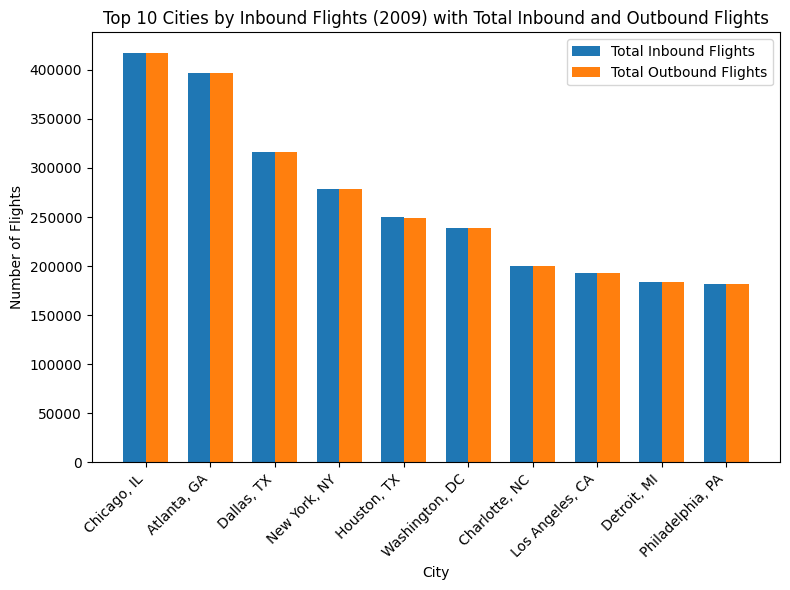

In [18]:
import matplotlib.pyplot as plt
top_10_cities = merged_df.sort_values('total_inbound_flights', ascending=False).head(10)

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

width = 0.35  # Width of the bars

ax.bar(top_10_cities.index, top_10_cities['total_inbound_flights'], width, label='Total Inbound Flights')
ax.bar(np.arange(len(top_10_cities.index)) + width, top_10_cities['total_outbound_flights'], width, label='Total Outbound Flights')
ax.set_xlabel('City')
ax.set_ylabel('Number of Flights')
ax.set_title('Top 10 Cities by Inbound Flights (2009) with Total Inbound and Outbound Flights')
ax.set_xticks(np.arange(len(top_10_cities.index)) + width / 2)
ax.set_xticklabels(top_10_cities.index, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

**PART III**

1.Read the input csv file from here or here and convert columns to rows.
The "Value" column values should come from the crop column names such as Maize Production (tonnes), Rice Production (tonnes) from the input csv file.
(hint: UnPivot melt).

2.For each unique value in column "Productions", you have to assign a unique integer/float value. The following is an example output with unique float value. You are not supposed to use custom function. You are not supposed to provide explicit mapping between values in "Produtions" and integer/float values (hint: use ordinal encoding).

3.Read "medical_data_synthetic.csv" and convert yes/no to 1/0 for non-numeric column ("obesity") without using custom function (lambda) for the medical dataset here. Column "gender" need to be converted to numeric too without custom function. (hint: use label encoding in sklearn library for "obesity" and use ordinal encoding for "gender")

In [19]:
df_food = pd.read_csv('/content/drive/MyDrive/DATA ANALYTICS/world_food_production.csv')
print(tabulate(df_food.head(10), headers='keys', tablefmt='psql'))

+----+-------------+--------+-----------------------------+------------------------------+-----------------------------+-----------------------------+--------------------------------+------------------------------+---------------------------------------+---------------------------------------+----------------------------------+---------------------------------+----------------------------+---------------------------------+--------------------------------+----------------------------------+---------------------------------+-------------------------------+--------------------------------------+-----------------------------------+--------------------------------------+---------------------------------+--------------------------------+------------------------------+
|    | Entity      |   Year |   Maize Production (tonnes) |   Rice  Production ( tonnes) |   Yams  Production (tonnes) |   Wheat Production (tonnes) |   Tomatoes Production (tonnes) |   Tea  Production ( tonnes ) |   Sweet pota

In [20]:
df_melted = pd.melt(df_food, id_vars=['Entity', 'Year'], var_name='Productions', value_name='Value')
production_columns = df_food.columns[2:]
df_melted['Productions'] = pd.Categorical(df_melted['Productions'], categories=production_columns, ordered=True)
df_melted = df_melted.sort_values(by=['Entity', 'Year', 'Productions']).reset_index(drop=True)

print(tabulate(df_melted.head(20), headers='keys', tablefmt='psql'))

+----+-------------+--------+-------------------------------------+------------------+
|    | Entity      |   Year | Productions                         |            Value |
|----+-------------+--------+-------------------------------------+------------------|
|  0 | Afghanistan |   1961 | Maize Production (tonnes)           | 700000           |
|  1 | Afghanistan |   1961 | Rice  Production ( tonnes)          | 319000           |
|  2 | Afghanistan |   1961 | Yams  Production (tonnes)           |      7.4677e+06  |
|  3 | Afghanistan |   1961 | Wheat Production (tonnes)           |      2.279e+06   |
|  4 | Afghanistan |   1961 | Tomatoes Production (tonnes)        |      1.87381e+06 |
|  5 | Afghanistan |   1961 | Tea  Production ( tonnes )          |  56315           |
|  6 | Afghanistan |   1961 | Sweet potatoes  Production (tonnes) |      3.27087e+06 |
|  7 | Afghanistan |   1961 | Sunflower seed  Production (tonnes) |  12000           |
|  8 | Afghanistan |   1961 | Sugar cane Pr

In [22]:
from sklearn.preprocessing import OrdinalEncoder
df = df_melted.Productions.unique()
prod_categories = df
enc = OrdinalEncoder(categories=[prod_categories], dtype=float)
df_melted[['Productions']] = enc.fit_transform(df_melted[['Productions']])
df_melted = df_melted.reset_index(drop=True)
print(tabulate(df_melted.head(20), headers='keys', tablefmt='psql'))

+----+-------------+--------+---------------+------------------+
|    | Entity      |   Year |   Productions |            Value |
|----+-------------+--------+---------------+------------------|
|  0 | Afghanistan |   1961 |             0 | 700000           |
|  1 | Afghanistan |   1961 |             1 | 319000           |
|  2 | Afghanistan |   1961 |             2 |      7.4677e+06  |
|  3 | Afghanistan |   1961 |             3 |      2.279e+06   |
|  4 | Afghanistan |   1961 |             4 |      1.87381e+06 |
|  5 | Afghanistan |   1961 |             5 |  56315           |
|  6 | Afghanistan |   1961 |             6 |      3.27087e+06 |
|  7 | Afghanistan |   1961 |             7 |  12000           |
|  8 | Afghanistan |   1961 |             8 |  45000           |
|  9 | Afghanistan |   1961 |             9 |  71813           |
| 10 | Afghanistan |   1961 |            10 |  10290           |
| 11 | Afghanistan |   1961 |            11 | 130000           |
| 12 | Afghanistan |   19

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

df_medical = pd.read_csv('/content/drive/MyDrive/DATA ANALYTICS/medical_data_synthetic.csv')
le = LabelEncoder()
df_medical['obesity'] = le.fit_transform(df_medical['obesity'])

ord = OrdinalEncoder()
df_medical['gender'] = ord.fit_transform(df_medical[['gender']])

print(tabulate(df_medical, headers='keys', tablefmt='psql'))

+----+----------------+------+---------+-----------+----------+
|    | patient_name   |   bp |   sugar |   obesity |   gender |
|----+----------------+------+---------+-----------+----------|
|  0 | ram            |  111 |     110 |         1 |        1 |
|  1 | radha          |  100 |     120 |         0 |        0 |
|  2 | kumar          |  120 |     120 |         1 |        1 |
|  3 | john           |  130 |      90 |         0 |        1 |
|  4 | lily           |   92 |      91 |         1 |        0 |
+----+----------------+------+---------+-----------+----------+
